# Ecommerce website : - case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv('C:/Users/arohi/.jupyter/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
#drop columns permanently Email,Address,Avatar in df
df.drop(["Email","Address","Avatar"],axis=1,inplace=True)

In [4]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
#First check null values in dataset
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
#to show all details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
#we want to predict the yearly Amount Spent which is continous numeric value means
#we predict continous numeric value means here apply regression algorithm
#apply multiple linear regression means Y=m1x1+m2x2+m3x3+......+mnxn+b

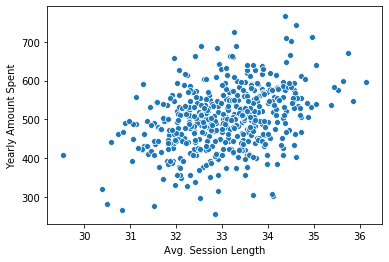

In [8]:
#we visualize scatterplot with one input Avg. Session Length  and output
#Yearly Amount Spent  
sns.scatterplot(data=df,x="Avg. Session Length",y="Yearly Amount Spent")
plt.show()

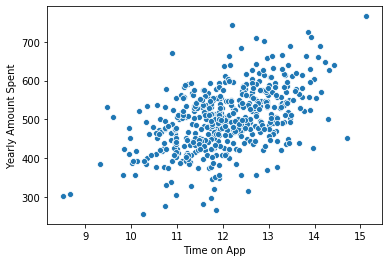

In [9]:
#we visualize scatterplot with one input Time on App  and output
#Yearly Amount Spent  
sns.scatterplot(data=df,x="Time on App",y="Yearly Amount Spent")
plt.show()

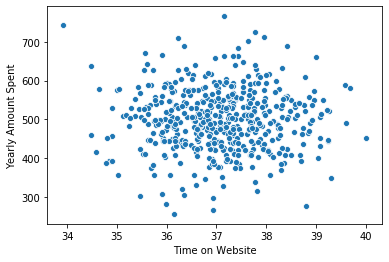

In [10]:
#we visualize scatterplot with one input Time on Website  and output
#Yearly Amount Spent  
sns.scatterplot(data=df,x="Time on Website",y="Yearly Amount Spent")
plt.show()

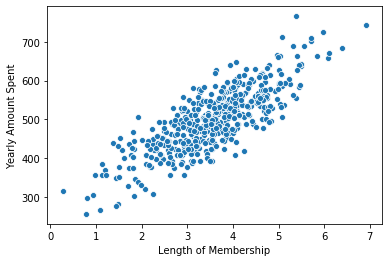

In [11]:
#we visualize scatterplot with one input Length of Membership  and output
#Yearly Amount Spent  
sns.scatterplot(data=df,x="Length of Membership",y="Yearly Amount Spent")
plt.show()

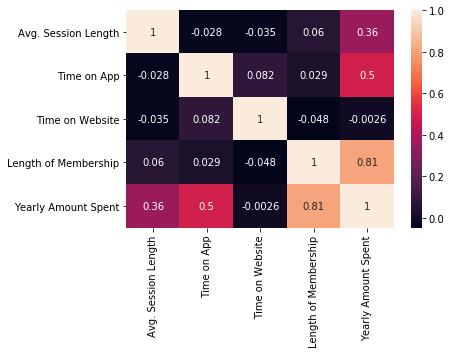

In [12]:
#check correlation between input and output with the help of corr()
#and visualize
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
#assumption of linear regression 
#1. There are no multicolinearity  : fulllfill

# Base line Model = Linear Regression

In [14]:
#we will separate independent and dependent variable 
#means select input and output variable from df
X=df.drop("Yearly Amount Spent",axis=1)
Y=df["Yearly Amount Spent"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#train test split
#now we will arrange to train and test the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [17]:
#we will call the linear regression class
from sklearn.linear_model import LinearRegression

In [18]:
#create object of LinearRegression
lr=LinearRegression()

In [19]:
#we will train data now
lr.fit(X_train,Y_train)

LinearRegression()

In [20]:
#we will test the data now
y_pred=lr.predict(X_test)

In [21]:
#Mean Squared Error Check
from sklearn.metrics import mean_squared_error

In [22]:
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
print("Mean Squared Error :",mse)

Mean Squared Error : 80.90062350316771


In [23]:
#Mean Squared Error : is very high

In [24]:
#evaluation method of LinearRegression then use R2-score inbuilt method :
from sklearn.metrics import r2_score

In [25]:
r2_score(Y_test,y_pred)

0.9884637235175601

In [26]:
#check coefficient /slope
lr.coef_

array([25.82792018, 38.80900146,  0.28174274, 61.30479927])

In [27]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [28]:
#check intercept 
lr.intercept_

-1048.820428862227

In [29]:
#2 assumption of Linear regression : there should be linear-relationship
#between input and output .
#here many input 
#trick , find residuals 
residuals=Y_test-y_pred
print(residuals)

304    -4.129900
340   -18.411546
47      0.724006
67     -9.594152
479   -21.652982
         ...    
331     8.846822
197    19.348423
95    -10.256829
122    15.609925
23     15.287542
Name: Yearly Amount Spent, Length: 150, dtype: float64


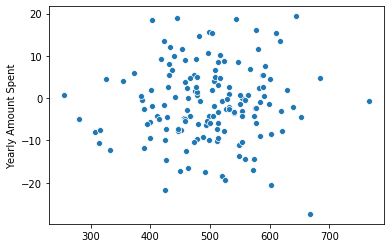

In [30]:
#relation check y_pred and residuals 
sns.scatterplot(y_pred,residuals)
plt.show()

In [31]:
#no fullfill linear relationship assumption because no linear relation between
#y_pred and residual means no relation between input and output

Skewness :  0.00642544001236376


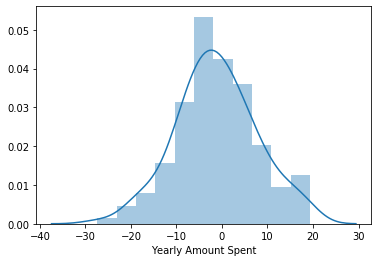

In [32]:
#3. Assumption : there should be a normal distributed curve means 
#no skewness means shold be symmetric curve
#distplot() means draw a N. D curve means frequency curve
from scipy.stats import skew
print("Skewness : ",skew(residuals))
sns.distplot(residuals)
plt.show()

In [33]:
#N.D assumption is fullfill

In [34]:
#Feature selection : - help to select imp features 
#feature_test user defined function
#first parameter score_func : criteria=f_regression if anova test and chi2 
#if chi-2 test
#second parameter : k means how many imp features from dataset
#model : Linear regression means classification
def feature_test(criteria,count,model):
    test = SelectKBest(score_func=criteria,k=count)
    X_train_new = test.fit_transform(X_train,Y_train)
    X_test_new = test.transform(X_test)
    
    model.fit(X_train_new,Y_train) #model train
    y_pred = model.predict(X_test_new) #model test
    #mean_squared_Error
    mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
    print("Mean Squared Error :",mse)
    print(r2_score(Y_test,y_pred))
    print(test.get_support())#show imp features
    #find residual
    residuals=Y_test-y_pred
    #relation check y_pred and residuals 
    sns.scatterplot(y_pred,residuals)
    plt.show()
    #check N.D curve
    from scipy.stats import skew
    print("Skewness : ",skew(residuals))
    sns.distplot(residuals)
    plt.show()
    return model

In [35]:
from sklearn.feature_selection import chi2 #chi-2 test
from sklearn.feature_selection import f_regression #ANova test
from sklearn.feature_selection import SelectKBest 

Mean Squared Error : 779.952367540688
0.8887802619378993
[False  True False  True]


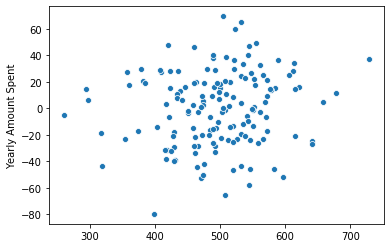

Skewness :  -0.1391529313246994


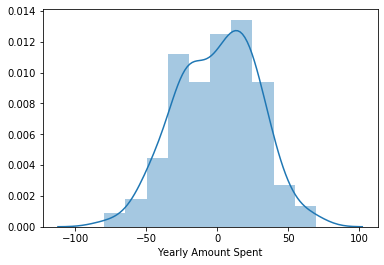

LinearRegression()

In [36]:
#Create object of LinearRegression class
lr=LinearRegression()
#call function
feature_test(f_regression,2,lr) #f_regression means =anova test and 2 : means
#no of imp features means k and lr means model train and test with Linear reg.

In [37]:
X=df[["Time on App","Length of Membership"]] #input imp
cdf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'] )
cdf

,Coeff
Time on App,37.078098
Length of Membership,62.452941


In [ ]:
#conclusion :
'''increasing "Time on App" by one unit increases yearly amount spent by  
37.07 𝑤ℎ𝑒𝑟𝑒𝑎𝑠,𝑖𝑛𝑐𝑟𝑒𝑎𝑠𝑖𝑛𝑔 𝑇𝑖𝑚𝑒 𝑜𝑛 App 𝑏𝑦 𝑜𝑛𝑒 𝑢𝑛𝑖𝑡 𝑖𝑛𝑐𝑟𝑒𝑎𝑠𝑒𝑠 𝑦𝑒𝑎𝑟𝑙𝑦 𝑎𝑚𝑜𝑢𝑛𝑡 𝑠𝑝𝑒𝑛𝑡 

According to the data above the largest increase of approximately $62.45 is 
observed when the "Length of Membership" is increased by one unit.

Using the predictions above we can develop ways in order to increase yearly 
amount spent by the customers. We can improve the app experience so that the
users spend more of their time on the app 
and develop it so that it becomes as efficient as the app or we can focus on
customer relationship so that people remain members for long periods of time.'''

In [38]:
#X.columns

Index(['Time on App', 'Length of Membership'], dtype='object')

In [39]:
#X.shape

In [40]:
#but not fullfill 2 assumption 
#1. no linear relation
#2. no N.D curve
#then goes to 
#polynomial linear regression 

In [41]:
#X=df[["Time on App","Length of Membership"]]
#Y=df["Yearly Amount Spent"]

In [42]:
#from sklearn.preprocessing import PolynomialFeatures

In [43]:
#Create the object of PolynomialFeatures (pass degree of X means increase the
#power of X)
#pf=PolynomialFeatures(2)#2 means pass how much degress

In [44]:
#X_poly=pf.fit_transform(X)

In [45]:
#Then apply same steps
#train test split
#now we will arrange to train and test the data
#X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.30,random_state=1)

In [46]:
#create object of LinearRegression class
#lr=LinearRegression()

In [47]:
#train the model
#lr.fit(X_train,Y_train)

In [48]:
#test hte model
#y_pred=lr.predict(X_test)

In [49]:
#mean_squared_Error
#mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
#print("Mean Squared Error :",mse)
#print("R2-score : ", r2_score(Y_test,y_pred))

In [50]:
 #find residual
#residuals=Y_test-y_pred
#relation check y_pred and residuals 
#sns.scatterplot(y_pred,residuals)
#plt.show()
 #check N.D curve
#from scipy.stats import skew
#print("Skewness : ",skew(residuals))
#sns.distplot(residuals)
#plt.show()